In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

# Data

In [3]:
pathes = ["path_and_label_train.csv","path_and_label_valid.csv","path_and_label_test.csv"] 

count=0
for path in pathes:
    bg=0
    pot=0

    df = pd.read_csv(path)
    sum_ = len(df["label"])
    for i in df["label"]:
        if i == 1:
            pot+=1
        else:
            bg+=1
    if count == 0:
        name = "train"
    elif count == 1:
        name = "valid"
    else:
        name = "test"
    print("{}: sum:{}, pot:{}, bg:{}".format(name ,str(sum_),str(pot), str(bg)))
    count +=1



train: sum:364, pot:182, bg:182
valid: sum:191, pot:101, bg:90
test: sum:1400, pot:1400, bg:0


In [10]:
file_name = "valid"

df = pd.read_csv("path_and_label_"+file_name+".csv")

for i in range(1,116):
    
    df=df.drop([90+i])

bg=0
pot=0

sum_ = len(df["label"])
for i in df["label"]:
    if i == 1:
        pot+=1
    else:
        bg+=1
if count == 0:
    name = "train"
elif count == 1:
    name = "valid"
else:
    name = "test"
print("{}: sum:{}, pot:{}, bg:{}".format(name ,str(sum_),str(pot), str(bg)))
count +=1

df.to_csv("path_and_label_"+file_name+".csv", index=None)


test: sum:191, pot:101, bg:90


In [13]:
df_1 = pd.read_csv("path_and_label_train.csv") 
df_2 = pd.read_csv("path_and_label_valid.csv")

df_3 = pd.concat([df_1,df_2])
df_3.to_csv("path_and_label_concat.csv",index=None)

# TSNE

In [49]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

digits = load_digits()
x = digits.data
y = digits.target
print(np.shape(x))
print(x)
print(np.shape(y))
print(y)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797,)
[0 1 2 ... 8 9 8]


In [ ]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x)


x_max, x_min = x_tsne[:, 0].max()*1.05, x_tsne[:, 0].min()*1.05
y_max, y_min = x_tsne[:, 1].max()*1.05, x_tsne[:, 1].min()*1.05

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, xlim=(x_min, x_max), ylim=(y_min, y_max)) 
ax.set_title("t-sne")
for i, target in enumerate(y):
    ax.text(x_tsne[i,0], x_tsne[i,1], target)

plt.show()

# bg/potC

(1000, 28, 28)
(1000, 784)
(448, 256, 256, 3)
(448, 196608)
background==0  potC==1


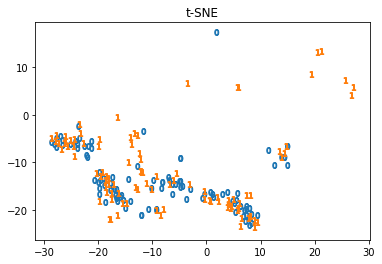

In [48]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score
from keras.preprocessing import image
from PIL import  Image


STANDARD_SIZE = (256, 256)

def load_visualize_data(n_sample):
    (_,_), (X_test, y_test) = mnist.load_data()
    X = np.zeros((n_sample * 10, X_test.shape[1], X_test.shape[2]))
    y = np.zeros(n_sample*10)
    
    for num in range(10):
        dest_indices = np.arange(num*n_sample, (num+1)*n_sample) 
        source_indices = np.where(y_test==num)[0][:n_sample]
        X[dest_indices, :, :] = X_test[source_indices, :, :]
        y[dest_indices] = y_test[source_indices] 
    return X, y
        
def img_to_matrix(filename, verbose=False):
    """
    parse image            
    """
    img = Image.open(filename)
    if verbose:
        print('changing size from %s to %s' % (str(img.size), str(STANDARD_SIZE)))
    img = img.resize(STANDARD_SIZE)
    imgArray = np.asarray(img)
    return imgArray  # imgArray.shape = (167 x 300 x 3)                                                                     



if __name__ == '__main__':
    
    X, y = load_visualize_data(100)
    X/=255.
    print(np.shape(X))
    X = X.reshape(X.shape[0], -1)
    print(np.shape(X))

    data = []
    label=[]  

    with open('path_and_label_train.csv',"r") as f:
        reader=csv.reader(f)
        header = next(reader)
        
        for i in reader:
            url=i[0]
            img = image.img_to_array(img_to_matrix(url))
            img=img.astype('float32')
            img /= 255.0
    
            data.append(img)
            label.append(i[1])
    
    data = np.array(data)
    print(np.shape(data))
    x = data.reshape(data.shape[0], -1)
    print(np.shape(x))
    decomp = TSNE(n_components=2)
    X_decomp = decomp.fit_transform(x)
    cmap = get_cmap("tab10")
    print("background==0  potC==1")
    for i in range(2):
        
        marker = "$" + str(i) + "$"
        indices = np.arange(i*100, (i+1)*100)
        plt.scatter(X_decomp[indices, 0], X_decomp[indices, 1], marker=marker, color=cmap(i))
    plt.title("t-SNE")
    plt.show()


# bg /potA

(1000, 28, 28)
(1000, 784)
(502, 256, 256, 3)
(502, 196608)
background==0  potA==1


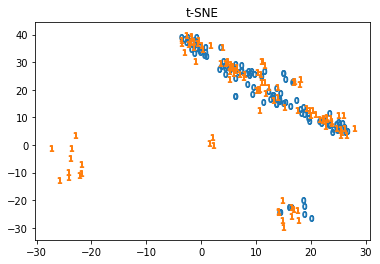

In [58]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score
from keras.preprocessing import image
from PIL import  Image


STANDARD_SIZE = (256, 256)

def load_visualize_data(n_sample):
    (_,_), (X_test, y_test) = mnist.load_data()
    X = np.zeros((n_sample * 10, X_test.shape[1], X_test.shape[2]))
    y = np.zeros(n_sample*10)
    
    for num in range(10):
        dest_indices = np.arange(num*n_sample, (num+1)*n_sample) 
        source_indices = np.where(y_test==num)[0][:n_sample]
        X[dest_indices, :, :] = X_test[source_indices, :, :]
        y[dest_indices] = y_test[source_indices] 
    return X, y
        
def img_to_matrix(filename, verbose=False):
    """
    parse image            
    """
    img = Image.open(filename)
    if verbose:
        print('changing size from %s to %s' % (str(img.size), str(STANDARD_SIZE)))
    img = img.resize(STANDARD_SIZE)
    imgArray = np.asarray(img)
    return imgArray  # imgArray.shape = (167 x 300 x 3)                                                                     



if __name__ == '__main__':
    
    X, y = load_visualize_data(100)
    X/=255.
    print(np.shape(X))
    X = X.reshape(X.shape[0], -1)
    print(np.shape(X))


    data = []
    label=[]  

    with open('path_and_label_train.csv',"r") as f:
        reader=csv.reader(f)
        header = next(reader)
        
        for i in reader:
            url=i[0]
            img = image.img_to_array(img_to_matrix(url))
            img=img.astype('float32')
            img /= 255.0
    
            data.append(img)
            label.append(i[1])
    
    data = np.array(data)
    print(np.shape(data))
    x = data.reshape(data.shape[0], -1)
    print(np.shape(x))
    decomp = TSNE(n_components=2)
    X_decomp = decomp.fit_transform(x)
    cmap = get_cmap("tab10")
    print("background==0  potA==1")
    for i in range(2):
        marker = "$" + str(i) + "$"
        indices = np.arange(i*100, (i+1)*100)
        plt.scatter(X_decomp[indices, 0], X_decomp[indices, 1], marker=marker, color=cmap(i))
    plt.title("t-SNE")
    plt.show()


# bg/ potA /potC

(1000, 28, 28)
(1000, 784)
(768, 256, 256, 3)
(768, 196608)
background==0  potA==1 potC==2


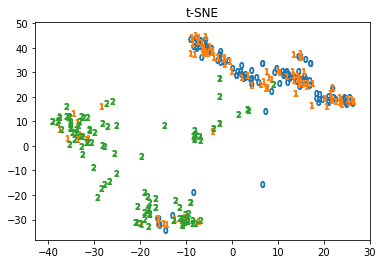

In [47]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score
from keras.preprocessing import image
from PIL import  Image


STANDARD_SIZE = (256, 256)

def load_visualize_data(n_sample):
    (_,_), (X_test, y_test) = mnist.load_data()
    X = np.zeros((n_sample * 10, X_test.shape[1], X_test.shape[2]))
    y = np.zeros(n_sample*10)
    
    for num in range(10):
        dest_indices = np.arange(num*n_sample, (num+1)*n_sample) 
        source_indices = np.where(y_test==num)[0][:n_sample]
        X[dest_indices, :, :] = X_test[source_indices, :, :]
        y[dest_indices] = y_test[source_indices] 
    return X, y
        
def img_to_matrix(filename, verbose=False):
    """
    parse image            
    """
    img = Image.open(filename)
    if verbose:
        print('changing size from %s to %s' % (str(img.size), str(STANDARD_SIZE)))
    img = img.resize(STANDARD_SIZE)
    imgArray = np.asarray(img)
    return imgArray  # imgArray.shape = (167 x 300 x 3)                                                                     



if __name__ == '__main__':
    
    X, y = load_visualize_data(100)
    X/=255.
    print(np.shape(X))
    X = X.reshape(X.shape[0], -1)
    print(np.shape(X))


    data = []
    label=[]  

    with open('path_and_label_train.csv',"r") as f:
        reader=csv.reader(f)
        header = next(reader)
        
        for i in reader:
            url=i[0]
            img = image.img_to_array(img_to_matrix(url))
            img=img.astype('float32')
            img /= 255.0
    
            data.append(img)
            label.append(i[1])
    
    data = np.array(data)
    print(np.shape(data))
    x = data.reshape(data.shape[0], -1)
    print(np.shape(x))
    decomp = TSNE(n_components=2)
    X_decomp = decomp.fit_transform(x)
    cmap = get_cmap("tab10")
    print("background==0  potA==1 potC==2")
    for i in range(3):
        marker = "$" + str(i) + "$"
        indices = np.arange(i*100, (i+1)*100)
        plt.scatter(X_decomp[indices, 0], X_decomp[indices, 1], marker=marker, color=cmap(i))
    plt.title("t-SNE")
    plt.show()


# potA /potC

(1000, 28, 28)
(1000, 784)
(586, 256, 256, 3)
(586, 196608)
potA==1 potC==2


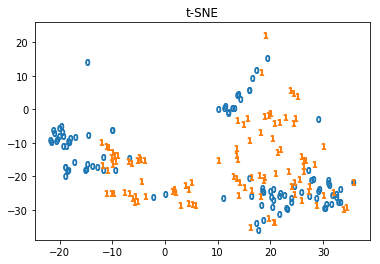

In [57]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score
from keras.preprocessing import image
from PIL import  Image


STANDARD_SIZE = (256, 256)

def load_visualize_data(n_sample):
    (_,_), (X_test, y_test) = mnist.load_data()
    X = np.zeros((n_sample * 10, X_test.shape[1], X_test.shape[2]))
    y = np.zeros(n_sample*10)
    
    for num in range(10):
        dest_indices = np.arange(num*n_sample, (num+1)*n_sample) 
        source_indices = np.where(y_test==num)[0][:n_sample]
        X[dest_indices, :, :] = X_test[source_indices, :, :]
        y[dest_indices] = y_test[source_indices] 
    return X, y
        
def img_to_matrix(filename, verbose=False):
    """
    parse image            
    """
    img = Image.open(filename)
    if verbose:
        print('changing size from %s to %s' % (str(img.size), str(STANDARD_SIZE)))
    img = img.resize(STANDARD_SIZE)
    imgArray = np.asarray(img)
    return imgArray  # imgArray.shape = (167 x 300 x 3)                                                                     



if __name__ == '__main__':
    
    X, y = load_visualize_data(100)
    X/=255.
    print(np.shape(X))
    X = X.reshape(X.shape[0], -1)
    print(np.shape(X))


    data = []
    label=[]  

    with open('path_and_label_train.csv',"r") as f:
        reader=csv.reader(f)
        header = next(reader)
        
        for i in reader:
            url=i[0]
            img = image.img_to_array(img_to_matrix(url))
            img=img.astype('float32')
            img /= 255.0
    
            data.append(img)
            label.append(i[1])
    
    data = np.array(data)
    print(np.shape(data))
    x = data.reshape(data.shape[0], -1)
    print(np.shape(x))
    decomp = TSNE(n_components=2)
    X_decomp = decomp.fit_transform(x)
    cmap = get_cmap("tab10")
    print("potA==1 potC==2")
    for i in range(2):
        marker = "$" + str(i) + "$"
        indices = np.arange(i*100, (i+1)*100)
        plt.scatter(X_decomp[indices, 0], X_decomp[indices, 1], marker=marker, color=cmap(i))
    plt.title("t-SNE")
    plt.show()


# bg/potA/potB/potC

In [55]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.manifold import TSNE
from sklearn.metrics import explained_variance_score
from keras.preprocessing import image
from PIL import  Image


STANDARD_SIZE = (256, 256)

def load_visualize_data(n_sample):
    (_,_), (X_test, y_test) = mnist.load_data()
    X = np.zeros((n_sample * 10, X_test.shape[1], X_test.shape[2]))
    y = np.zeros(n_sample*10)
    
    for num in range(10):
        dest_indices = np.arange(num*n_sample, (num+1)*n_sample) 
        source_indices = np.where(y_test==num)[0][:n_sample]
        X[dest_indices, :, :] = X_test[source_indices, :, :]
        y[dest_indices] = y_test[source_indices] 
    return X, y
        
def img_to_matrix(filename, verbose=False):
    """
    parse image            
    """
    img = Image.open(filename)
    if verbose:
        print('changing size from %s to %s' % (str(img.size), str(STANDARD_SIZE)))
    img = img.resize(STANDARD_SIZE)
    imgArray = np.asarray(img)
    return imgArray  # imgArray.shape = (167 x 300 x 3)                                                                     



if __name__ == '__main__':
    
    X, y = load_visualize_data(100)
    X/=255.
    print(np.shape(X))
    X = X.reshape(X.shape[0], -1)
    print(np.shape(X))


    data = []
    label=[]  

    with open('path_and_label_train.csv',"r") as f:
        reader=csv.reader(f)
        header = next(reader)
        
        for i in reader:
            url=i[0]
            img = image.img_to_array(img_to_matrix(url))
            img=img.astype('float32')
            img /= 255.0
    
            data.append(img)
            label.append(i[1])
    
    data = np.array(data)
    print(np.shape(data))
    x = data.reshape(data.shape[0], -1)
    print(np.shape(x))
    decomp = TSNE(n_components=2)
    X_decomp = decomp.fit_transform(x)
    cmap = get_cmap("tab10")

    for i in range(4):
        marker = "$" + str(i) + "$"
        indices = np.arange(i*100, (i+1)*100)
        plt.scatter(X_decomp[indices, 0], X_decomp[indices, 1], marker=marker, color=cmap(i))
    plt.title("t-SNE")
    plt.show()


(1000, 28, 28)
(1000, 784)
(981, 256, 256, 3)
(981, 196608)
